In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
import os
from numpy import array
 
# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline


In [11]:
path = os.path.join(os.path.expanduser('../'),'dataset', 'KDDTrain+_20Percent.txt')
panda = pd.read_csv(path, header=0).as_matrix()




df = pd.DataFrame(panda[:,:41])


df.columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]
#print(df.loc[:,['srv_rerror_rate']])

x  = df.loc[:,['duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate']]

#print(x)

y = pd.DataFrame(panda[:,41:42])
y.columns = ['Targets']

y1 = y.replace(['normal', 'anomaly'], [1, 0])
y2=y1
#eliminate the other words
y1 = y1[y1.Targets == (0 or 1)]

#print(y1)

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


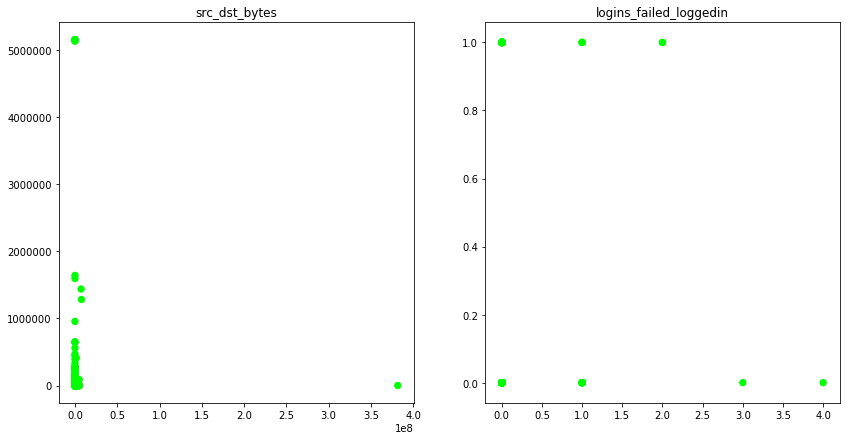

In [12]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.src_bytes, x.dst_bytes, c=colormap[y1.Targets], s=40)
plt.title('src_dst_bytes')
 
plt.subplot(1, 2, 2)
plt.scatter(x.num_failed_logins, x.logged_in, c=colormap[y1.Targets], s=40)
plt.title('logins_failed_loggedin')

In [13]:
# K Means Cluster
model = KMeans(n_clusters=2)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
# This is what KMeans thought
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


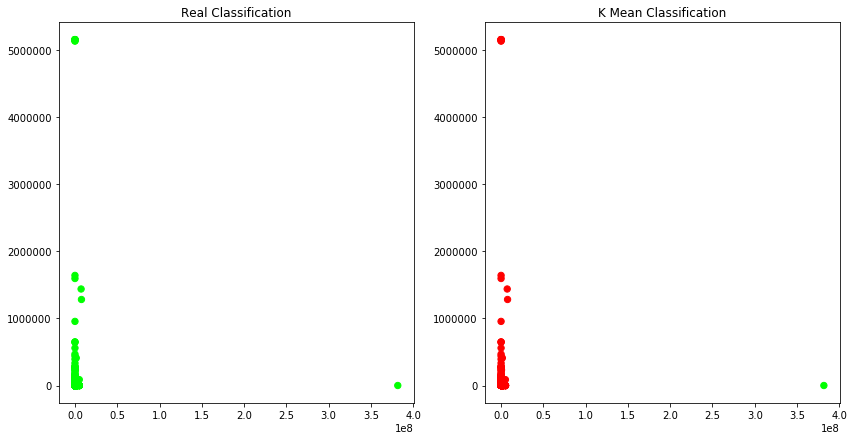

In [15]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.src_bytes, x.dst_bytes, c=colormap[y1.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.src_bytes, x.dst_bytes, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

In [16]:
# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print (model.labels_)
print (predY)

[0 0 0 ..., 0 0 0]
[1 1 1 ..., 1 1 1]


/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


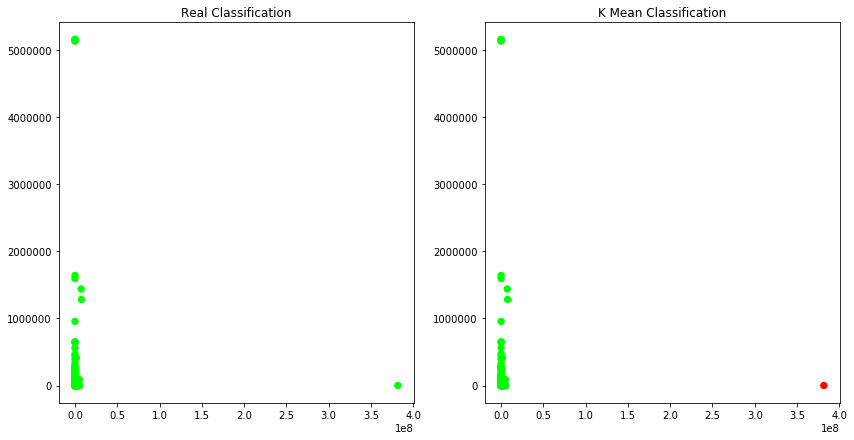

In [17]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime'])
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.src_bytes, x.dst_bytes, c=colormap[y1.Targets], s=40)
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(x.src_bytes, x.dst_bytes, c=colormap[predY], s=40)
plt.title('K Mean Classification')

In [18]:
# Performance Metrics
sm.accuracy_score(y2, predY)

ValueError: Can't handle mix of unknown and binary

In [ ]:
# Confusion Matrix
sm.confusion_matrix(y2, predY)

In [ ]:
sm.adjusted_rand_score(x.src_bytes, predY)

In [ ]:
print(type(y2))
print(type(predY))

print(sm.classification_report(y2, predY))